# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load = "Pyber_Analysis/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_type_count= pyber_data_df.groupby(["type"]).count()["driver_count"]
city_type_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
city_drivers_count= pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_drivers_count.head()


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
city_fares_count= pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_fares_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
#  4. Get the average fare per ride for each city type. 
city_average_count= pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_average_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [7]:
# 5. Get the average fare per driver for each city type. 
city_averageper_count= pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_averageper_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [8]:
#  6. Create a PyBer summary DataFrame.

type_summary_df = pd.DataFrame({
          "Total Rides" : city_type_count ,
          "Total Drivers": city_drivers_count ,
          "Total Fares": city_fares_count,
          "Average Fare per Ride": city_average_count,
          "Average Fare per Driver": city_averageper_count})

type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,537,537,537
Suburban,625,8570,8570,8570,8570
Urban,1625,59602,59602,59602,59602


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
type_summary_df.index.name = None

In [10]:
#  8. Format the type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map('${:,.2f}'.format)

type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Ride"] = type_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Driver"] = type_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

type_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,$537.00,$537.00,$537.00,$537.00
Suburban,625,"$8,570.00","$8,570.00","$8,570.00","$8,570.00"
Urban,1625,"$59,602.00","$59,602.00","$59,602.00","$59,602.00"


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type = pyber_data_df.groupby(["type","date"]).sum()["fare"]
date_type

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_type = date_type.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_type = pyber_data_df.pivot(index ='date',columns = 'type', values = 'fare')
date_type

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_type = date_type.loc["2019-01-01":"2019-04-29"] 
date_type.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_type.index = pd.to_datetime(date_type.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
date_type.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)

In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_type = date_type.resample('W').sum()
date_type.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


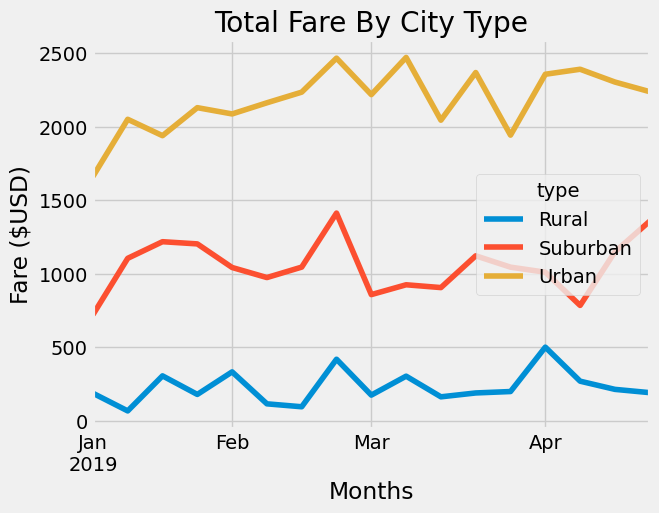

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
date_type.plot()
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig("resources/PyBer_fare_summary.png",dpi= 300, bbox_inches='tight')
